In [20]:
import torch

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from misc import simple_regret, get_problem_settings, bin_mean_cost, set_matplotlib_params

In [21]:
env = "hartmann"
algo = "mes"
budget = 10
bins = 10

In [22]:
data = torch.load("./results_exp_"+env+"_sf"+algo+"_lin/exp_"+env+"_sf"+algo+"_lin_results.pt")
li = [torch.clamp(x[0],0).cpu() for x in data]
mu1,sigma1,bins1 = bin_mean_cost(li,budget=budget,nbins=bins,idx_comp=0)

In [26]:
data = torch.load("./results_exp_"+env+"_mf"+algo+"_lin/exp_"+env+"_mf"+algo+"_lin_results.pt")
li = [torch.clamp(x[0],0).cpu() for x in data]
mu2,sigma2,bins2 = bin_mean_cost(li,budget=budget,nbins=bins,idx_comp=0)
# mu2+=1e-2

In [32]:
data[0][0][:, 2]

tensor([0.0000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 1.0000,
        1.0000, 1.0000, 1.0000, 0.2000, 1.0000, 0.2000, 1.0000, 1.0000, 0.2000,
        1.0000], dtype=torch.float64)

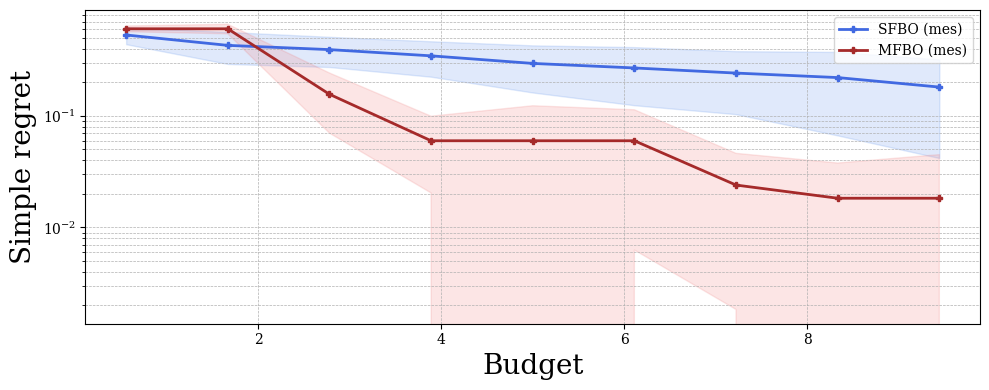

In [25]:
plt.figure(figsize=(10, 4))
plt.rc('font', family='serif')

plt.plot(bins1, mu1, '-P', color='royalblue', linewidth=2, markersize=4, label=f"SFBO ({algo})")
plt.plot(bins2, mu2, '-P', color='brown', linewidth=2, markersize=4, label=f"MFBO ({algo})")

plt.fill_between(bins1, 
                 [float(regret - std) for regret, std in zip(mu1, sigma1)], 
                 [float(regret + std) for regret, std in zip(mu1, sigma1)], 
                 color='cornflowerblue', alpha=0.2)

plt.fill_between(bins2, 
                 [float(regret - std) for regret, std in zip(mu2, sigma2)], 
                 [float(regret + std) for regret, std in zip(mu2, sigma2)], 
                 color='lightcoral', alpha=0.2)

plt.xlabel("Budget", fontsize=20)
plt.ylabel("Simple regret", fontsize=20)
plt.yscale("log")

# plt.title("Simple regret vs. Budget "+env)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()